In [85]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

df = pd.read_csv("Cleaned_DF.csv")

In [86]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [87]:
mask1 = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
dz = df[mask1][features+["Transported"]]
dz.shape

(1921, 12)

In [88]:
def ord_num(a,mean,sigma):
    if a == 0:
        return 0.0
    elif a < mean:
        return 1.0
    elif a > mean + sigma:
        return 3.0
    else:
        return 2.0

# x = pd.Series
def v4(x):
 
    tmp = x[x>0]
    mean = tmp.mean()
    sigma = tmp.std()

    return [ord_num(x[i],mean, sigma) for i in x.index]

In [89]:
pd.value_counts(v4(dz["RoomService"]))

1.0    751
0.0    742
2.0    298
3.0    130
dtype: int64

In [90]:
pd.value_counts(v4(dz["FoodCourt"]))

1.0    820
0.0    689
2.0    279
3.0    133
dtype: int64

In [91]:
pd.value_counts(v4(dz["ShoppingMall"]))

0.0    807
1.0    761
2.0    274
3.0     79
dtype: int64

In [92]:
pd.value_counts(v4(dz["Spa"]))

1.0    970
0.0    567
2.0    240
3.0    144
dtype: int64

In [93]:
pd.value_counts(v4(dz["VRDeck"]))

1.0    844
0.0    743
2.0    202
3.0    132
dtype: int64

In [102]:
def m4(X):
    res = pd.DataFrame(X)
    
    for col in X.columns:
        res[col] = v4(X[col])
    return res

In [103]:
behavior = m4(dz[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [104]:
behavior.head(20)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,0.0,3.0,1.0
3,0.0,1.0,1.0,2.0,1.0
11,1.0,3.0,1.0,1.0,1.0
12,1.0,0.0,2.0,0.0,1.0
25,2.0,1.0,1.0,0.0,0.0
28,1.0,3.0,0.0,2.0,1.0
29,2.0,0.0,1.0,1.0,0.0
31,1.0,0.0,2.0,0.0,1.0
34,1.0,1.0,0.0,1.0,0.0


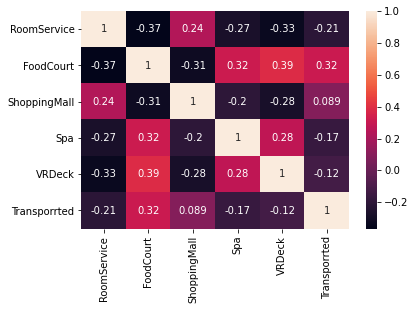

In [106]:
behavior["Transporrted"] = dz["Transported"]

corrMatrix = behavior.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()